<a href="https://colab.research.google.com/github/yongkgu/Computer_Vision/blob/main/corners_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


## **Practice – Harris corners**

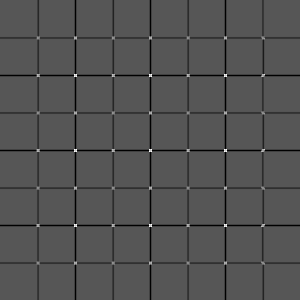

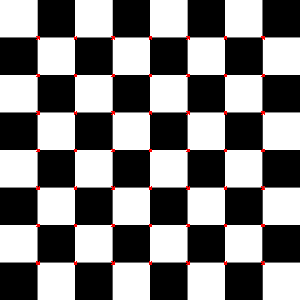

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow

img = cv.imread('gdrive/MyDrive/MachineVision/chessboard.png')
img = cv.resize(img,(300,300))

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
dst_ = cv.normalize(dst, None, 255, 0, cv.NORM_MINMAX, cv.CV_8UC1)

img[dst>0.01*dst.max()]=[0,0,255]

cv_imshow(dst_)
cv_imshow(img)


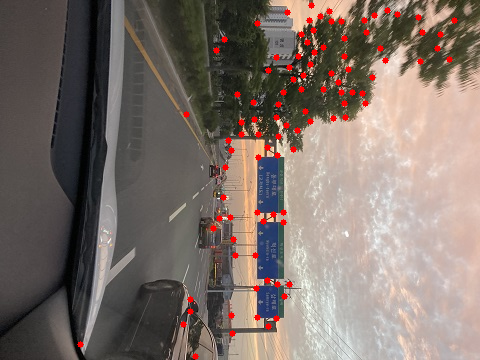

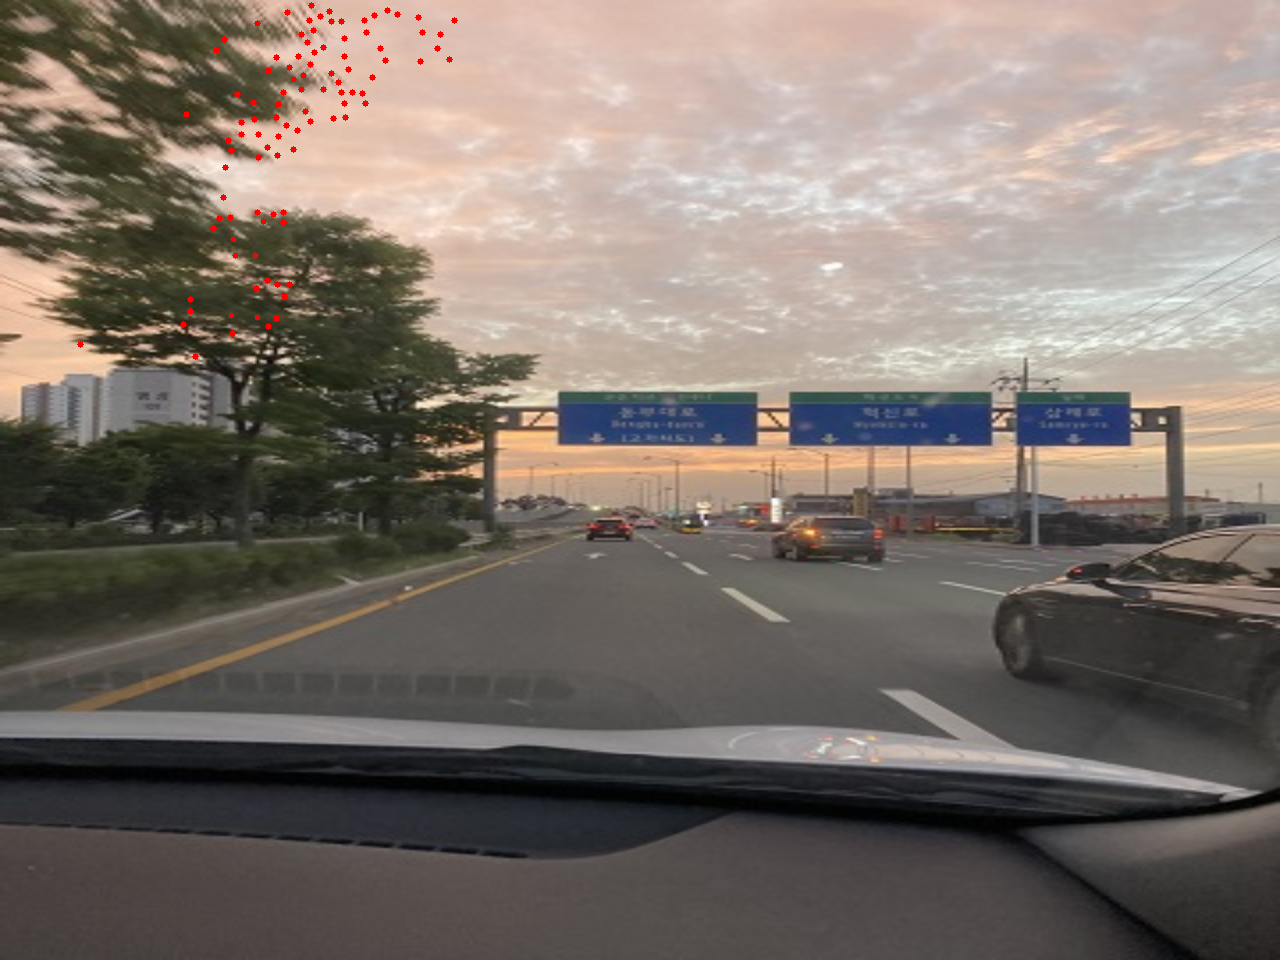

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow


img = cv.imread('gdrive/MyDrive/MachineVision/Image.jpg')
img_rot = cv.rotate(img, cv.ROTATE_90_CLOCKWISE) # 90도 로테이션
img_resize = cv.resize(img,(640*2,480*2))

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray_rot = cv.cvtColor(img_rot,cv.COLOR_BGR2GRAY)
gray_re = cv.cvtColor(img_resize,cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
gray_rot = np.float32(gray_rot)
gray_re = np.float32(gray_re)

corners = cv.goodFeaturesToTrack(gray, maxCorners=100,qualityLevel=0.1, minDistance=10)
corners_rot = cv.goodFeaturesToTrack(gray_rot, maxCorners=100,qualityLevel=0.1, minDistance=10)                           
corners_re = cv.goodFeaturesToTrack(gray_re, maxCorners=100,qualityLevel=0.1, minDistance=10)

for c in corners:
  x, y = c.ravel()
  cv.circle(img,(x,y),3,(0,0,255),-1)

for c in corners_rot:
  x, y = c.ravel()
  cv.circle(img_rot,(x,y),3,(0,0,255),-1)

for c in corners_rot:
  x, y = c.ravel()
  cv.circle(img_resize,(x,y),3,(0,0,255),-1)

cv_imshow(img)
cv_imshow(img_rot)
cv_imshow(img_resize)

## **Practice – SIFT-based blob detector**

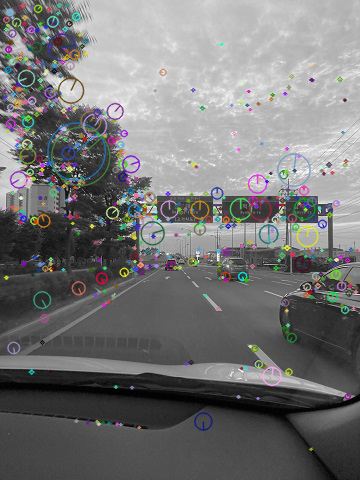

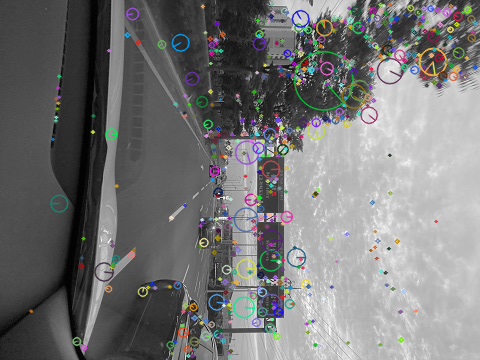

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow
import subprocess
subprocess.call("pip install -U opencv-python".split())

img = cv.imread('gdrive/MyDrive/MachineVision/Image.jpg')
img_rot = cv.rotate(img, cv.ROTATE_90_CLOCKWISE) # 90도 로테이션
img_resize = cv.resize(img,(640*2,480*2))

gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray_rot = cv.cvtColor(img_rot,cv.COLOR_BGR2GRAY)
gray_re = cv.cvtColor(img_resize,cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()

kp = sift.detect(gray,None)
kp_rot = sift.detect(gray_rot,None)
kp_re = sift.detect(gray_re,None)

img = cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_rot = cv.drawKeypoints(gray_rot,kp_rot,img_rot,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_re = cv.drawKeypoints(gray_re,kp_re,img_resize,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv_imshow(img)
cv_imshow(img_rot)
cv_imshow(img_re)

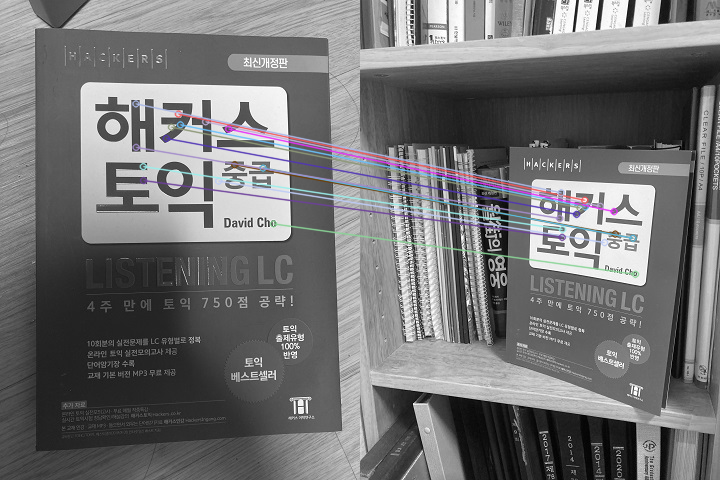

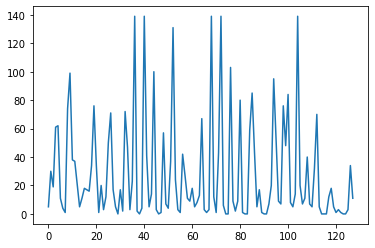

([<matplotlib.lines.Line2D at 0x7f5bb85b8c50>], None)

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow
import matplotlib.pyplot as plt
import subprocess
subprocess.call("pip install -U opencv-python".split())
img1 = cv.imread('gdrive/MyDrive/MachineVision/book.jpg',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('gdrive/MyDrive/MachineVision/books.jpg',cv.IMREAD_GRAYSCALE)
# find the keypoints and descriptors
sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# Match descriptors.
bf = cv.BFMatcher()
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 15 matches.
img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:15], None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv_imshow(img3)

plt.plot(np.arange(128), des1[matches[0].queryIdx]), plt.show()
plt.plot(np.arange(128), des2[matches[0].trainIdx]), plt.show()